In [4]:
#라이브러리 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, skew, kurtosis

In [5]:
# 샘플 데이터 생성
np.random.seed(42)
data = np.random.normal(loc=0, scale=1, size=1000)

In [6]:
# 기본 통계값 출력
print("평균:", np.mean(data))
print("표준편차:", np.std(data))
print("왜도:", skew(data))
print("첨도:", kurtosis(data))

평균: 0.01933205582232549
표준편차: 0.9787262077473543
왜도: 0.11680083110533511
첨도: 0.06620589292148393


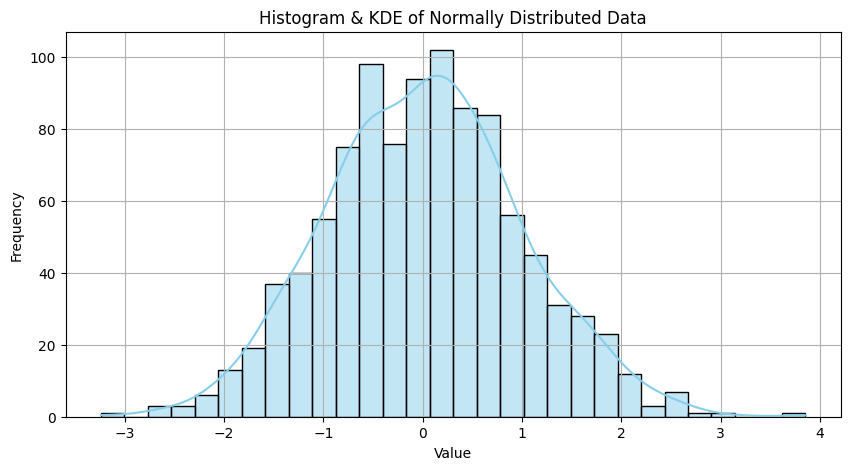

In [8]:
# 히스토그램 + 커널 밀도 추정 (KDE)
plt.figure(figsize=(10, 5))
sns.histplot(data, kde=True, bins=30, color='skyblue')
plt.title("Histogram & KDE of Normally Distributed Data")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

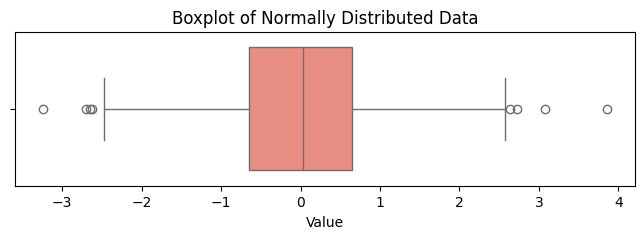

In [9]:
# Boxplot
plt.figure(figsize=(8, 2))
sns.boxplot(x=data, color='salmon')
plt.title("Boxplot of Normally Distributed Data")
plt.xlabel("Value")
plt.show()

In [13]:
from scipy.stats import zscore

# Z-score 계산
z_scores = zscore(data)
outliers_z = data[np.abs(z_scores) > 3]

print(f"Z-Score 기준 이상치 개수: {len(outliers_z)}개")

Z-Score 기준 이상치 개수: 3개


In [14]:
# IQR 기반 이상치 탐지
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers_iqr = data[(data < lower_bound) | (data > upper_bound)]

print(f"IQR 기준 이상치 개수: {len(outliers_iqr)}개")

IQR 기준 이상치 개수: 8개


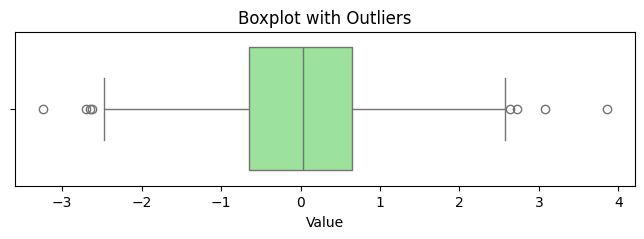

In [15]:
# 이상치 시각화
plt.figure(figsize=(8, 2))
sns.boxplot(x=data, color='lightgreen')
plt.title("Boxplot with Outliers")
plt.xlabel("Value")
plt.show()